In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [86]:
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\Oasis infobyte data files\\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [90]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [92]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [94]:
# Get columns with numerical data types
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical Features:", numerical_features)

Numerical Features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


In [96]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display duplicate rows (if any)
print(duplicate_rows)

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [98]:
# Drop duplicate rows and keep the first occurrence
housing_data_cleaned = df.drop_duplicates()

# If you want to modify the dataset in place
df.drop_duplicates

# Check the number of rows after dropping duplicates
print(f"Rows after removing duplicates: {len(df)}")

Rows after removing duplicates: 545


In [100]:
# Verify no duplicates exist
print(f"Number of duplicates remaining: {df.duplicated().sum()}")

Number of duplicates remaining: 0


In [102]:
# Drop duplicates based on specific columns
housing_data_cleaned = df.drop_duplicates(subset=['price', 'area','bedrooms','stories','mainroad','guestroom','basement','hotwaterheating','airconditioning','parking','prefarea','prefarea'])
housing_data_cleaned

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [104]:
print(f"Number of duplicates remaining: {df.duplicated().sum()}")

Number of duplicates remaining: 0


In [106]:
# Example: Replace "Yes" with 1 and "No" with 0 in a column
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'unfurnished':0, 'semi-furnished':11})

C:\Users\anjal\AppData\Local\Temp\ipykernel_66788\391901337.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'unfurnished':0, 'semi-furnished':11})


In [108]:
# Replace values in multiple columns
columns_to_update = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[columns_to_update] = df[columns_to_update].replace({'yes': 1, 'no': 0})

C:\Users\anjal\AppData\Local\Temp\ipykernel_66788\2689881722.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_update] = df[columns_to_update].replace({'yes': 1, 'no': 0})


In [110]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,11
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


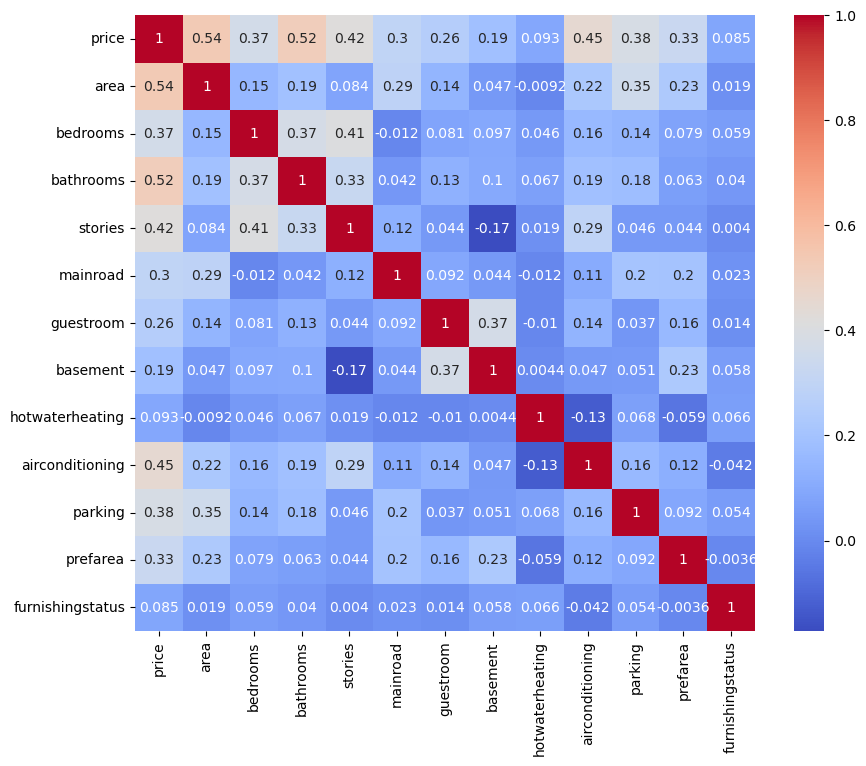

In [112]:
#Correlation Analysis (for Numerical Features)
#Use the correlation matrix to check relationships between features and the target variable.
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [116]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use RFE to select features
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Check selected features
print(X.columns[rfe.support_])

Index(['bedrooms', 'stories', 'guestroom', 'parking', 'prefarea'], dtype='object')


In [120]:
#Analyze Relationships Between Features and Target
#For Numerical Features:
#Compute correlations using .corr().

correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus    0.085333
Name: price, dtype: float64


In [126]:
#For Categorical Features:
#Use groupby or crosstab to see how categories influence the target.

df.groupby('area')['price'].mean()

area
1650      3150000.0
1700      1890000.0
1836      2275000.0
1905      4340000.0
1950      2835000.0
            ...    
12900     4900000.0
12944     3500000.0
13200     8365000.0
15600     5943000.0
16200    10150000.0
Name: price, Length: 284, dtype: float64

In [139]:
#Define Features (X) and Target (y):
X = df.drop(columns=["price"]) 
y = df["price"]

In [143]:
#Split the data into training and testing sets:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (436, 12)
X_test shape: (109, 12)
y_train shape: (436,)
y_test shape: (109,)


In [147]:
#View the coefficients and intercept:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [   7427.53203779   84530.20337094 1099733.81105892  409266.48816809
  342747.8674042   142443.60767644  426498.61301833  708549.95372095
  746682.97998635  234078.91257934  639537.91920761   10467.69659009]
Intercept: 230588.45655755792


In [171]:
#Use performance metrics to assess the model:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1804534335994.4126
R-squared: 0.6429895623086799


In [173]:
# Ensure that y_pred is predicted from the same set of X_test
y_pred = model.predict(X_test)  # Assuming 'model' is your trained model
# Check if X_test and y_test have the same length
assert len(X_test) == len(y_test), "X_test and y_test must have the same length"
assert len(X_test) == len(y_pred), "X_test and y_pred must have the same length"

In [226]:
import numpy as np

# Check if there are any NaN or Infinite values
print(np.any(np.isnan(X_train)))  # Check for NaNs in X_train
print(np.any(np.isnan(X_test)))   # Check for NaNs in X_test
print(np.any(np.isnan(y_train)))  # Check for NaNs in y_train
print(np.any(np.isnan(y_test)))   # Check for NaNs in y_test

print(np.any(np.isinf(X_train)))  # Check for Infs in X_train
print(np.any(np.isinf(X_test)))   # Check for Infs in X_test
print(np.any(np.isinf(y_train)))  # Check for Infs in y_train
print(np.any(np.isinf(y_test)))   # Check for Infs in y_test

False
False
False
False
False
False
False
False


In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transform, do not fit again!

In [230]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')
X_test columns: Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus'],
      dtype='object')


In [232]:
from sklearn.linear_model import LinearRegression

# Assuming X_train_scaled and y_train are ready and consistent
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [234]:
y_pred = model.predict(X_test_scaled)

In [236]:
print(f"y_pred shape: {y_pred.shape}")

y_pred shape: (109,)


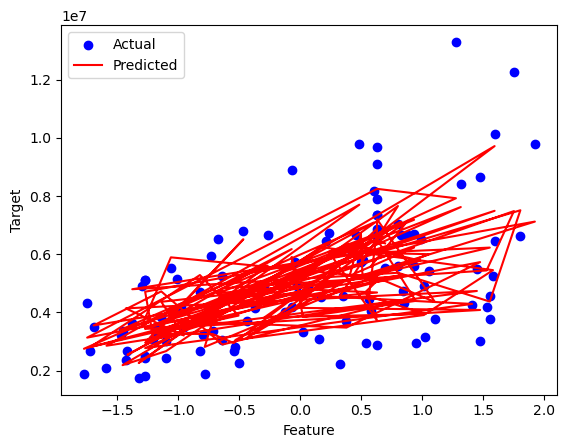

In [238]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are 1D arrays
plt.scatter(X_test_scaled[:, 0], y_test, color='blue', label='Actual')  # Use the first feature for plotting
plt.plot(X_test_scaled[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

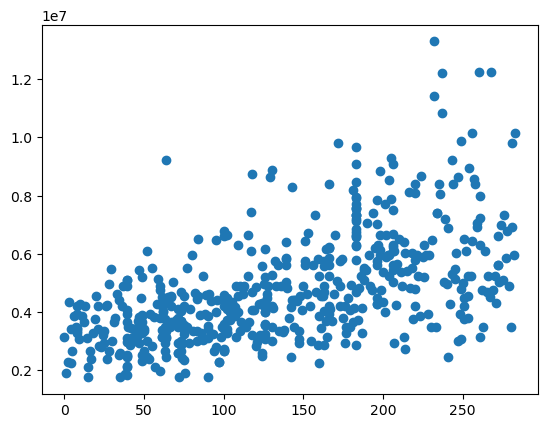

In [240]:
plt.scatter(df.area,df.price)
plt.show()